<a href="https://www.kaggle.com/code/joeportilla/producci-n-mensual-de-energ-a-en-colombia-eda?scriptVersionId=125086032" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 0. Introducción

<img src="https://raw.githubusercontent.com/JoePortilla/EnergyProductionCol-EDA/main/img/energyproduction_eda_cover.webp?token=GHSAT0AAAAAAB6AMADC5TFIULPHAY4XD3FUZBR77PA" width="800" alt="logo" style="display:block;margin:auto;">

- El conjunto de datos proporciona estadísticas mensuales de electricidad de la Agencia Internacional de Energía (AIE) para múltiples países y territorios en todo el mundo.
- Incluye información sobre la generación de electricidad mensual desde 2010 hasta 2022.
- La producción de energía se mide en gigavatios-hora (GWh) y abarca una variedad de productos energéticos, incluyendo hidroeléctrica, eólica, solar, geotérmica, nuclear, combustibles fósiles y otros.
- Estos datos pueden ser útiles para analizar las tendencias de consumo y producción de electricidad a nivel mundial y regional, así como para evaluar el impacto ambiental de la industria eléctrica.

## Objetivo general
Work in progress.

## Objetivo especifico
Este notebook se centra en explorar y visualizar el conjunto de datos.
- Realizar un análisis exploratorio de datos para comprender los datos. 
- Work in progress.

## Paquetes utilizados:
- Procesamiento de datos
    - Pandas.
- Procesamiento numérico.
    - NumPy
- Visualización de datos
    - Seaborn
    - Matplotlib.

## Dataset
- [Monthly Electricity Production in GWh [2010-2022]](https://www.kaggle.com/datasets/ccanb23/iea-monthly-electricity-statistics)

## Referencias
- [International Energy Agency (IEA)](https://www.iea.org/data-and-statistics/data-tools/monthly-electricity-statistics)

## Instructor
Joseph Santiago Portilla - Ingeniero Electrónico.
- GitHub: https://github.com/JoePortilla
- Twitter: https://twitter.com/JoePortilla
- LinkedIn: https://www.linkedin.com/in/PortillaJoe
- Kaggle: https://www.kaggle.com/joeportilla


# 1. Ajustes Iniciales

## 1.1 Importación de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Definición de estilo de gráficas

In [2]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-whitegrid")

# 2. Carga de Dataset y Revisión inicial

## 2.1. Lectura de CSV

In [3]:
df = pd.read_csv('/kaggle/input/iea-monthly-electricity-statistics/data.csv')

## 2.2. Exploración inicial del dataframe

### Info. general del dataset

El conjunto de datos contiene las siguientes variables:

- `COUNTRY`: Nombre del país
- `CODE_TIME`: Un código que representa el mes y año (por ejemplo, JAN2010 para enero de 2010)
- `TIME`: El mes y año en un formato más legible para los humanos (por ejemplo, enero de 2010)
- `YEAR`: El año del dato
- `MONTH`: El mes del dato como un número (1-12)
- `MONTH_NAME`: El mes del dato como una cadena (por ejemplo, enero)
- `PRODUCT`: El tipo de producto energético (por ejemplo, Hidroeléctrica, Eólica, Solar)
- `VALUE`: La cantidad de electricidad generada en gigavatios-hora (GWh)
- `DISPLAY_ORDER`: El orden en el que se deben mostrar los productos
- `yearToDate`: La cantidad de electricidad generada para el año actual hasta el mes actual en GWh
- `previousYearToDate`: La cantidad de electricidad generada para el año anterior hasta el mes actual en GWh
- `share`: La participación del producto en la generación total de electricidad para el país en formato decimal.

### Variables categoricas
- COUNTRY
- CODE_TIME
- TIME
- MONTH_NAME
- PRODUCT

### Variables numéricas
- YEAR
- MONTH
- VALUE
- DISPLAY_ORDER
- yearToDate
- previousYearToDate
- share

In [4]:
df

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728000,1,1.647189e+04,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469000,2,4.940909e+03,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216000,3,9.082380e+02,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083000,4,9.960000e-01,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730000,7,2.143030e+05,NaN,0.930108
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,23,3.355042e+06,3.320634e+06,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,24,5.393606e+04,4.899452e+04,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,25,7.100997e+04,7.242158e+04,0.016594
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,146425.474534,26,1.749805e+06,1.670531e+06,0.396168


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181915 entries, 0 to 181914
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COUNTRY             181915 non-null  object 
 1   CODE_TIME           181915 non-null  object 
 2   TIME                181915 non-null  object 
 3   YEAR                181915 non-null  int64  
 4   MONTH               181915 non-null  int64  
 5   MONTH_NAME          181915 non-null  object 
 6   PRODUCT             181915 non-null  object 
 7   VALUE               181915 non-null  float64
 8   DISPLAY_ORDER       181915 non-null  int64  
 9   yearToDate          181915 non-null  float64
 10  previousYearToDate  164810 non-null  float64
 11  share               181915 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.7+ MB


In [6]:
df['COUNTRY'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'IEA Total', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'OECD Americas',
       'OECD Asia Oceania', 'OECD Europe', 'OECD Total', 'Poland',
       'Portugal', 'Republic of Turkiye', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States', 'Colombia', 'Argentina', 'Brazil', 'Bulgaria',
       'Croatia', 'Cyprus', 'India', 'Malta', 'North Macedonia',
       'Romania', 'Serbia', 'Costa Rica'], dtype=object)

In [7]:
df['PRODUCT'].unique()

array(['Hydro', 'Wind', 'Solar', 'Geothermal', 'Total combustible fuels',
       'Coal', 'Oil', 'Natural gas', 'Combustible renewables',
       'Net electricity production', 'Electricity supplied',
       'Used for pumped storage', 'Distribution losses',
       'Final consumption', 'Renewables', 'Non-renewables', 'Others',
       'Other renewables aggregated', 'Low carbon', 'Fossil fuels',
       'Other combustible non-renewables', 'Not specified',
       'Total imports', 'Total exports', 'Electricity trade', 'Nuclear',
       'Other renewables'], dtype=object)

### Dimensión del datafrane

In [8]:
df.shape

(181915, 12)

### Comprobación de valores faltantes

El dataset esta completo y no cuenta con valores faltantes

In [9]:
df.isnull().sum(axis=0)

COUNTRY                   0
CODE_TIME                 0
TIME                      0
YEAR                      0
MONTH                     0
MONTH_NAME                0
PRODUCT                   0
VALUE                     0
DISPLAY_ORDER             0
yearToDate                0
previousYearToDate    17105
share                     0
dtype: int64

# 3. Preprocesamiento

## Feature selection

In [10]:
df.drop(['CODE_TIME', 'TIME', 'DISPLAY_ORDER', 'yearToDate', 'previousYearToDate'], axis=1, inplace=True)

## Column renaming

In [11]:
df.rename(columns={'COUNTRY':'country',
                   'YEAR':'year',
                   'MONTH':'month',
                   'MONTH_NAME':'month_name',
                   'PRODUCT':'product',
                   'VALUE':'value'},
          inplace=True)

## Data filtering

In [12]:
filt = (df['country'] == 'Colombia')
df = df.loc[filt]

## 3.4. Dataframe preprocesado

In [13]:
df.head()

,country,year,month,month_name,product,value,share
46557,Colombia,2014,1,January,Hydro,3903.977,0.684582
46558,Colombia,2014,1,January,Wind,5.648,0.000990
46559,Colombia,2014,1,January,Solar,1.065,0.000187
46560,Colombia,2014,1,January,Total combustible fuels,1792.024,0.314241
46561,Colombia,2014,1,January,Coal,521.938,0.091524


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 46557 to 180953
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     2548 non-null   object 
 1   year        2548 non-null   int64  
 2   month       2548 non-null   int64  
 3   month_name  2548 non-null   object 
 4   product     2548 non-null   object 
 5   value       2548 non-null   float64
 6   share       2548 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 159.2+ KB


# 4. Análisis Univariado

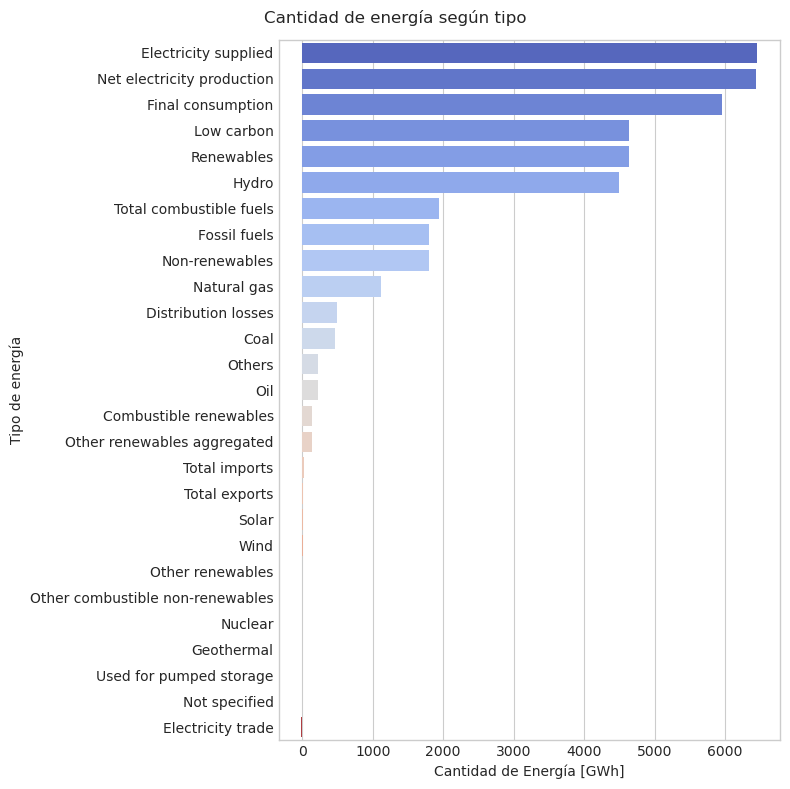

In [15]:
order = df.groupby('product').mean()['value'].sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Cantidad de energía según tipo')

sns.barplot(data=df, x='value', y='product', ax=ax, estimator='mean', errorbar=None, order=order, palette='coolwarm')
ax.set_xlabel('Cantidad de Energía [GWh]')
ax.set_ylabel('Tipo de energía')

plt.tight_layout()

# 5. Análisis Multivariado

## 5.5. Correlación

In [16]:
corr = df.corr()
corr

,year,month,value,share
year,1.000000,-0.007658,-0.014379,-0.051125
month,-0.007658,1.000000,0.011920,-0.000608
value,-0.014379,0.011920,1.000000,0.996805
share,-0.051125,-0.000608,0.996805,1.000000


<AxesSubplot:>

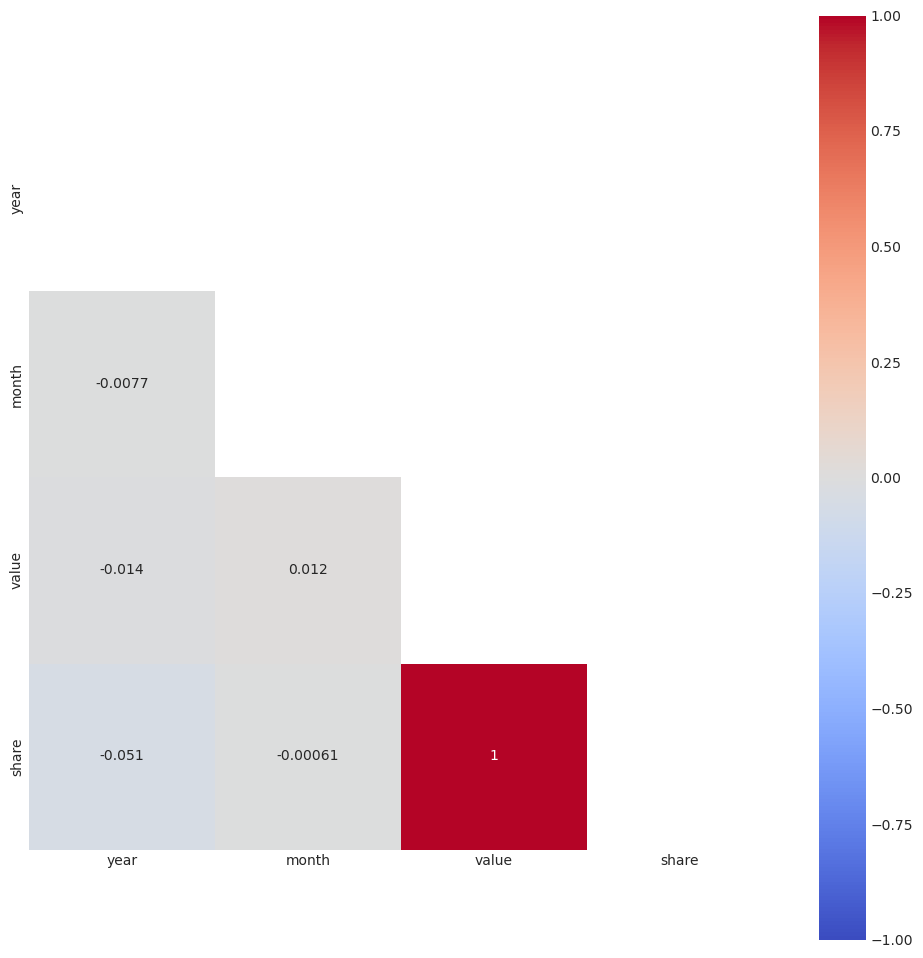

In [17]:
# Generación de una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='coolwarm', mask=mask, square=True, annot=True, center=0, vmin=-1, vmax=1)

# 6. Conclusiones EDA

- Work in progress
-  